# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousedata_combined= pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"], how="right")
mousedata_combined.head()


# Display the data table for preview
mousedata_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mouse_count = len(mousedata_combined["Mouse ID"].value_counts())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mouseid = mousedata_combined[["Mouse ID", "Timepoint"]]
unique_mouseid.head()
                                    

,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Why do we have to add mousedata_combined again in the parentheses? 
mouseid_duplicate = mousedata_combined[mousedata_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mouseid_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
mouseid_duplicate['Mouse ID'].unique()
#how did the starter code do this first? what other function could I have used? 

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. #is this not dropping the duplicates right
#clean_mousedata = mousedata_combined.drop_duplicates(subset=['Mouse ID'], keep='first')
#clean_mousedata.head()

#notes:
#use loc function to search particular Mouse ID - conditional loc
#use negation operator to set up conditonal to search for all mouse ids excep g989

clean_df = mousedata_combined.loc[~mousedata_combined['Mouse ID'].isin(['g989'])]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mousecount = len(clean_df["Mouse ID"].value_counts())
clean_mousecount

248

In [8]:
clean_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#PSEUDOCODE: #do I need to convert the tumor volume column name?

# #-generate summary statistics 
summary_mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
summary_median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
summary_var = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
summary_std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
summary_sem = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()


#PSEUDOCODE:
#before i understood we need to groupby "drug regimen" so its using that as a marker for calculations 
# var_tumorvol = clean_df("Tumor Volume(mm3)").var() 
# var_tumorvol

# median_tumorvol = clean_df("Tumor Volume(mm3)").median()
# median_tumorvol 

# std_tumorvol = clean_df("Tumor Volume(mm3)").std()
# std_tumorvol 

# sem_tumorvol = clean_df("Tumor Volume(mm3)").sem()
# sem_tumorvol 

#create dataframe 
#summary_mousedata = clean_df.groupby(["Drug Regimen"])[["mean_tumorvol", "median_tumorvol", "std_tumorvol", "sem_tumorvol"]]
#summary_mousedata.head(_)

summary_df = pd.DataFrame({
    "Mean Tumor Volume" : summary_mean, 
    "Median Tumor Volume": summary_median,
    "Tumor Volume Variance": summary_var, 
    "Tumor Volume Std. Dev.": summary_std, 
    "Tumor Volume Std. Err.": summary_sem,
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_df2.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [11]:
regimen_count = clean_df['Drug Regimen'].value_counts()


Text(0, 0.5, '# of Observed Mouse Timepoints')

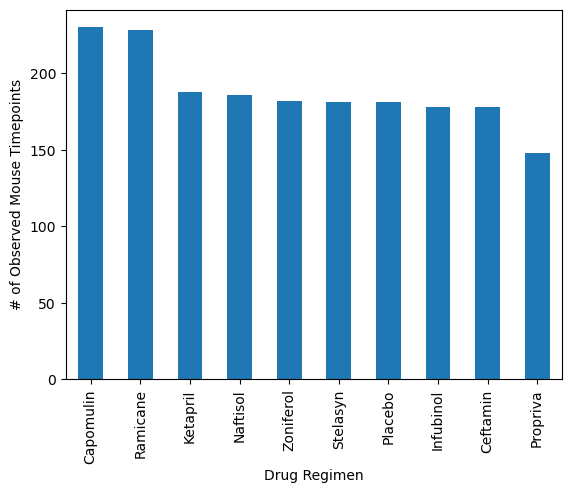

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

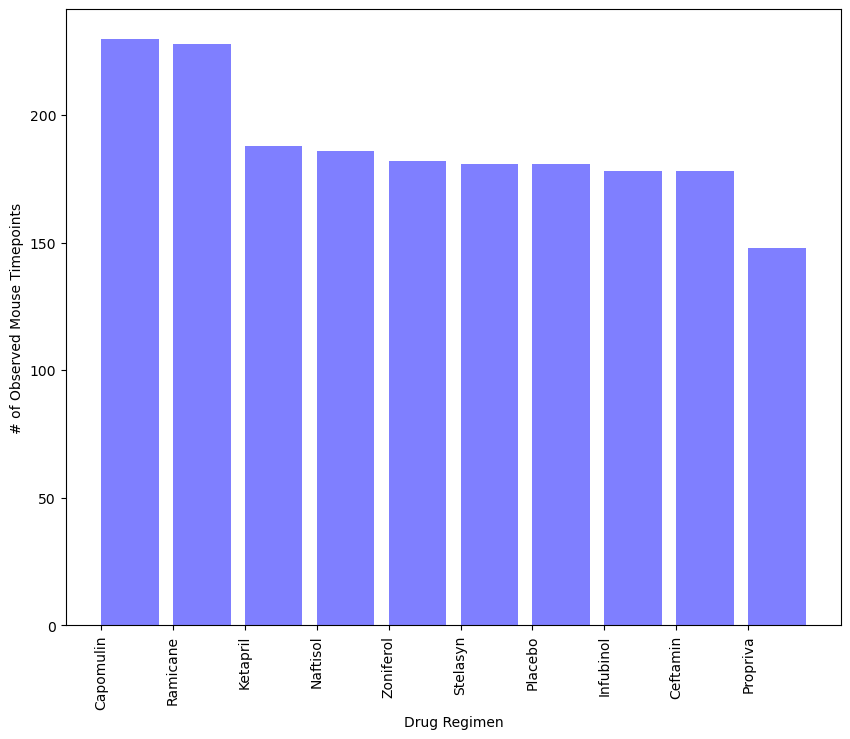

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import numpy as np

x_axis = np.arange(len(clean_df["Drug Regimen"]))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10, 8))
plt.bar(clean_df["Drug Regimen"].value_counts().index.values,clean_df["Drug Regimen"].value_counts().values, color='b', alpha=0.5, align='edge')
plt.tick_params(axis='x', rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



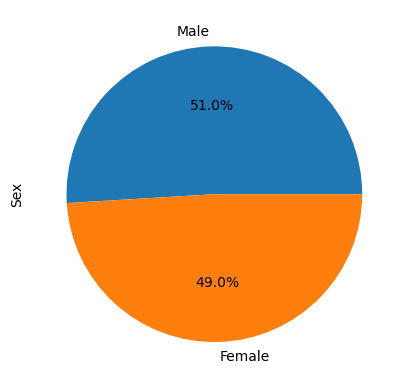

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_df.Sex.value_counts()
gender_distribution.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

(-1.0999999297639522,
 1.0999999966554264,
 -1.0999999100756188,
 1.0999999844482926)

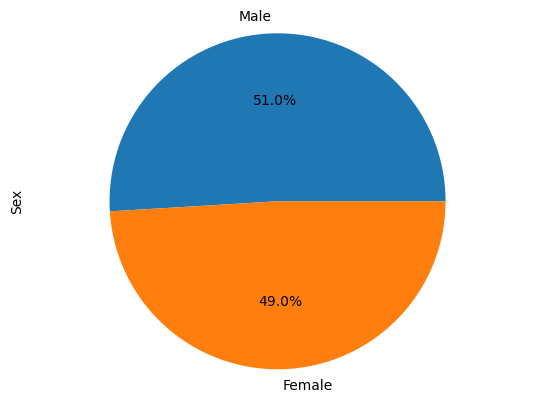

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ('Male', 'Female')
plt.pie(gender_distribution, labels=labels,
        autopct="%1.1f%%", startangle=1800)
plt.ylabel('Sex')
plt.axis("equal")

## Quartiles, Outliers and Boxplots

### Start by getting the last (greatest) timepoint for each mouse
final_tumorvol = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
final_tumorvol.head()

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_vol_data_merge = pd.merge(clean_df, final_tumorvol,on=["Mouse ID", "Timepoint"], how = "right")
tumor_vol_data_merge.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [18]:
treatment_options = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data_list = []

for treatment in treatment_options:
    final_tumor_volume = tumor_vol_data_merge.loc[tumor_vol_data_merge["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    tumor_data_list.append(final_tumor_volume)
    
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/76/jb4rsfs93334vqf862rsx8jh0000gn/T/ipykernel_52443/2248846530.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatment_options)


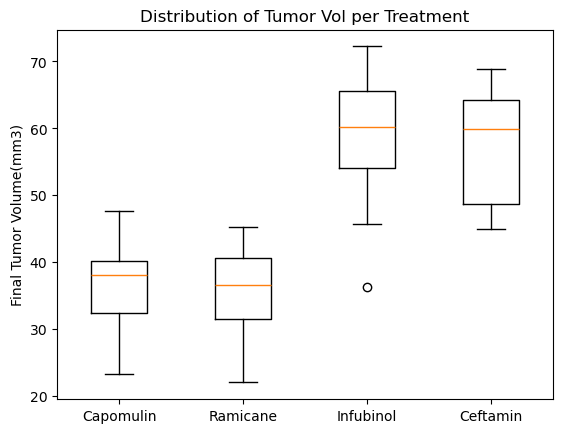

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
finaltumvol = tumor_data_list
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Tumor Vol per Treatment")
ax1.set_ylabel("Final Tumor Volume(mm3)")
ax1.set_xticklabels(treatment_options)
ax1.boxplot(finaltumvol)
plt.show()

## Line and Scatter Plots

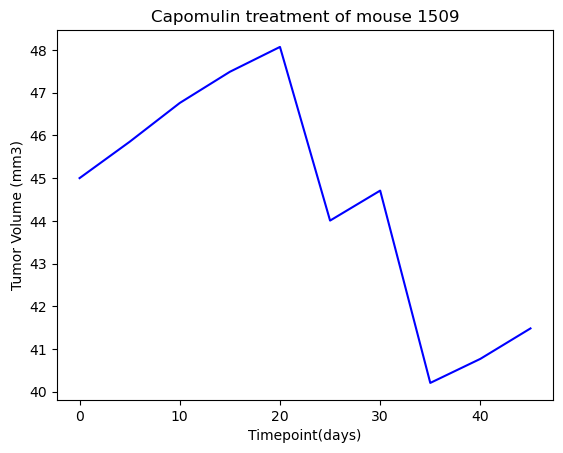

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mouse = "l509"
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"]== mouse]
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], color='blue')
plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



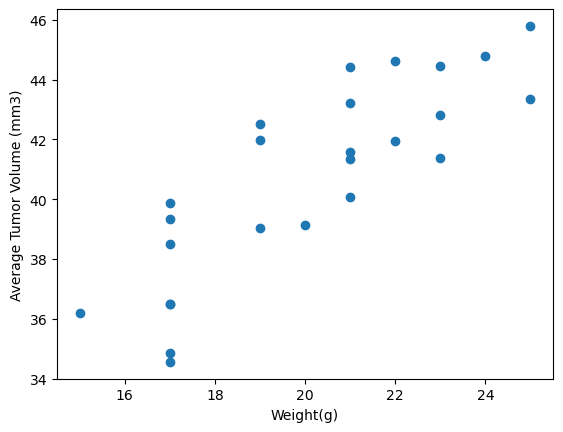

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight = capomulin_data.groupby("Mouse ID")["Weight (g)"]
tumorsize = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"]

avg_weight = weight.mean()
avg_tumorsize = tumorsize.mean()
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show
plt.scatter(avg_weight, avg_tumorsize)


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


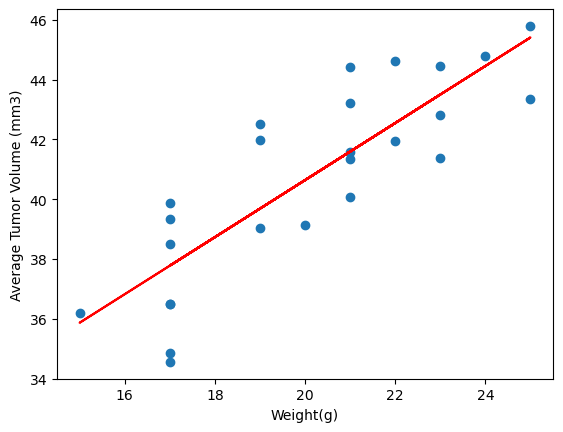

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_weight,avg_tumorsize)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
 
x_values = avg_weight
y_values = avg_tumorsize
regress_values =  slope * x_values + intercept
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x =" + str(round(intercept,2))
plt.scatter(avg_weight, avg_tumorsize)
plt.annotate(line_eq,(0.84,21.55),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

           
                       